In [98]:
# Importacion de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random


%matplotlib inline

plt.style.use('default') # para graficos matplotlib
plt.rcParams['figure.figsize'] = (5, 5)

sns.set(style="whitegrid") # grid seaborn

# pd.options.display.float_format = '{:20,.0f}'.format # notacion output

# Acceso a set de datos

In [103]:
path = "data/"
df_props_full = pd.read_csv(path + "train.csv")
df_test = pd.read_csv(path + "test.csv")

# Conversión de tipos

In [104]:
df_props_full['fecha'] = pd.to_datetime(df_props_full['fecha'])
df_test['fecha'] = pd.to_datetime(df_test['fecha'])

In [105]:
# Convierto todos los valores 1/0 a uint8
df_props_full['gimnasio'] = df_props_full['gimnasio'].astype('uint8')
df_props_full['usosmultiples'] = df_props_full['usosmultiples'].astype('uint8')
df_props_full['piscina'] = df_props_full['piscina'].astype('uint8')
df_props_full['escuelascercanas'] = df_props_full['escuelascercanas'].astype('uint8')
df_props_full['centroscomercialescercanos'] = df_props_full['centroscomercialescercanos'].astype('uint8')

df_test['gimnasio'] = df_test['gimnasio'].astype('uint8')
df_test['usosmultiples'] = df_test['usosmultiples'].astype('uint8')
df_test['piscina'] = df_test['piscina'].astype('uint8')
df_test['escuelascercanas'] = df_test['escuelascercanas'].astype('uint8')
df_test['centroscomercialescercanos'] = df_test['centroscomercialescercanos'].astype('uint8')

In [106]:
# Convierto los representables en uint8. Utilizo el tipo de pandas UInt8Dtype para evitar conflicto con NaN
df_props_full['antiguedad'] = df_props_full['antiguedad'].astype(pd.UInt8Dtype())
df_props_full['habitaciones'] = df_props_full['habitaciones'].astype(pd.UInt8Dtype())
df_props_full['garages'] = df_props_full['garages'].astype(pd.UInt8Dtype())
df_props_full['banos'] = df_props_full['banos'].astype(pd.UInt8Dtype())

df_test['antiguedad'] = df_test['antiguedad'].astype(pd.UInt8Dtype())
df_test['habitaciones'] = df_test['habitaciones'].astype(pd.UInt8Dtype())
df_test['garages'] = df_test['garages'].astype(pd.UInt8Dtype())
df_test['banos'] = df_test['banos'].astype(pd.UInt8Dtype())

In [107]:
# Convierto los representables en uint16. Utilizo el tipo de pandas UInt16Dtype para evitar conflicto con NaN
df_props_full['metroscubiertos'] = df_props_full['metroscubiertos'].astype(pd.UInt16Dtype())
df_props_full['metrostotales'] = df_props_full['metrostotales'].astype(pd.UInt16Dtype())

df_test['metroscubiertos'] = df_test['metroscubiertos'].astype(pd.UInt16Dtype())
df_test['metrostotales'] = df_test['metrostotales'].astype(pd.UInt16Dtype())

In [108]:
# Convierto los representables en uint32. Utilizo el tipo de pandas UInt32Dtype para evitar conflicto con NaN
df_props_full['id'] = df_props_full['id'].astype(pd.UInt32Dtype())
df_props_full['idzona'] = df_props_full['idzona'].astype(pd.UInt32Dtype())
# df_props_full['Precio_MEX'] = df_props_full['Precio_MEX'].astype(pd.UInt32Dtype())
# df_props_full['Precio_USD'] = df_props_full['Precio_USD'].astype(pd.UInt32Dtype())
df_props_full['precio'] = df_props_full['precio'].astype('float32')

df_test['id'] = df_test['id'].astype(pd.UInt32Dtype())
df_test['idzona'] = df_test['idzona'].astype(pd.UInt32Dtype())

In [8]:
features = df_props_full
len(features)

240000

In [9]:
features.corr()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,1.000000,0.002696,-0.002220,-0.001893,-0.001941,0.000280,0.001804,0.003623,-0.000239,0.001511,0.000696,-0.000257,-0.001543,-0.004014,-0.002146,-0.000889
antiguedad,0.002696,1.000000,0.159373,-0.078656,-0.063351,0.077990,0.044821,0.030616,-0.101883,0.008250,-0.106388,-0.095266,-0.136524,-0.005126,-0.009686,0.073097
habitaciones,-0.002220,0.159373,1.000000,0.243112,0.489695,0.517499,0.367938,-0.047764,-0.007486,0.007764,-0.030025,-0.005873,-0.012056,0.018928,0.000925,0.251014
garages,-0.001893,-0.078656,0.243112,1.000000,0.435112,0.379190,0.235931,-0.018294,0.005892,-0.000294,0.122430,0.131324,0.117440,0.084461,0.075237,0.348543
banos,-0.001941,-0.063351,0.489695,0.435112,1.000000,0.683101,0.543252,-0.002771,-0.054064,0.060019,0.083278,0.097835,0.127115,-0.021811,-0.027297,0.534060
metroscubiertos,0.000280,0.077990,0.517499,0.379190,0.683101,1.000000,0.734490,-0.047889,-0.018422,0.046043,0.032568,0.045425,0.062742,-0.026743,-0.046432,0.629187
metrostotales,0.001804,0.044821,0.367938,0.235931,0.543252,0.734490,1.000000,-0.032124,0.014757,0.044079,0.021484,0.023762,0.068299,-0.050645,-0.072560,0.514411
idzona,0.003623,0.030616,-0.047764,-0.018294,-0.002771,-0.047889,-0.032124,1.000000,-0.057904,0.102763,0.005315,0.001869,0.030414,0.014544,0.030030,0.073644
lat,-0.000239,-0.101883,-0.007486,0.005892,-0.054064,-0.018422,0.014757,-0.057904,1.000000,-0.481296,-0.039118,-0.062442,-0.061804,-0.066013,-0.083778,-0.157514
lng,0.001511,0.008250,0.007764,-0.000294,0.060019,0.046043,0.044079,0.102763,-0.481296,1.000000,0.004241,-0.005106,0.024837,-0.038965,-0.047305,0.052578


# Dropna Tipo de propiedad

In [10]:
features.tipodepropiedad.isna().value_counts()

False    239954
True         46
Name: tipodepropiedad, dtype: int64

In [11]:
# Drop de datos sin tipo
features = features.dropna(subset=['tipodepropiedad'])
features = features.reset_index(drop=True)

len(features)

239954

# Metros

In [14]:
print('Metrocubiertos con datos nulos: ', features.metroscubiertos.isna().sum())
print('Metrocubiertos con datos nulos: ', features.metrostotales.isna().sum())
print('Publicaciones sin metros cubiertos y totales: ', len(features.loc[(features.metroscubiertos.isna() & features.metrostotales.isna()),:]))
print('Publicaciones con metroscubiertos==metrostotales: ', len(features.loc[features.metroscubiertos == features.metrostotales, :]))
print('Publicaciones con metroscubiertos>metrostotales (Error): ', len(features.loc[features.metroscubiertos > features.metrostotales, ['metroscubiertos','metrostotales']]))

Metrocubiertos con datos nulos:  17386
Metrocubiertos con datos nulos:  51458
Publicaciones sin metros cubiertos y totales:  0
Publicaciones con metroscubiertos==metrostotales:  37883
Publicaciones con metroscubiertos>metrostotales (Error):  70285


Swapeo columnas metroscubiertos-metrostotales en el caso que la primera es mayor a la segunda

In [15]:
cond = features.metroscubiertos > features.metrostotales
features.loc[cond, ['metroscubiertos', 'metrostotales']] = features.loc[cond, ['metrostotales', 'metroscubiertos']].values

/home/seba/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
print('Publicaciones con metroscubiertos>metrostotales (Error): ', len(features.loc[features.metroscubiertos > features.metrostotales, ['metroscubiertos','metrostotales']]))

Publicaciones con metroscubiertos>metrostotales (Error):  0


In [18]:
features['tot-cub'] = features.metrostotales - features.metroscubiertos

/home/seba/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
# Calculo diferencia promedio entre metrostotales y metroscubiertos por cada tipo de propiedad
meanDifByType = features.groupby('tipodepropiedad').agg({'tot-cub':'mean'}).fillna(0).T.round(0).astype(np.uint16)
meanDifByType

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Casa uso de suelo,Departamento Compartido,Duplex,Edificio,Garage,Hospedaje,...,Lote,Nave industrial,Oficina comercial,Otros,Quinta Vacacional,Rancho,Terreno,Terreno comercial,Terreno industrial,Villa
tot-cub,7,58,52,46,83,17,23,121,0,0,...,0,43,34,32,94,20,46,95,124,58


In [20]:
for index, row in features.iterrows():
    if (np.isnan(row.metroscubiertos)):
        features.loc[index,'metroscubiertos'] = (row.metrostotales - (meanDifByType.loc['tot-cub',row.tipodepropiedad])).astype(np.uint16)
    if (np.isnan(row.metrostotales)):
        features.loc[index,'metrostotales'] = (row.metroscubiertos + meanDifByType.loc['tot-cub',row.tipodepropiedad]).astype(np.uint16)

/home/seba/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
print('Metrocubiertos con datos nulos: ', features.metroscubiertos.isna().sum())
print('Metrostotales con datos nulos: ', features.metrostotales.isna().sum())

Metrocubiertos con datos nulos:  0
Metrocubiertos con datos nulos:  0


### Set Test

In [109]:
print('Metrocubiertos con datos nulos: ', df_test.metroscubiertos.isna().sum())
print('Metrocubiertos con datos nulos: ', df_test.metrostotales.isna().sum())
print('Publicaciones sin metros cubiertos y totales: ', len(df_test.loc[(df_test.metroscubiertos.isna() & df_test.metrostotales.isna()),:]))
print('Publicaciones con metroscubiertos==metrostotales: ', len(df_test.loc[df_test.metroscubiertos == df_test.metrostotales, :]))
print('Publicaciones con metroscubiertos>metrostotales (Error): ', len(df_test.loc[df_test.metroscubiertos > df_test.metrostotales, ['metroscubiertos','metrostotales']]))

Metrocubiertos con datos nulos:  4299
Metrocubiertos con datos nulos:  12655
Publicaciones sin metros cubiertos y totales:  0
Publicaciones con metroscubiertos==metrostotales:  9400
Publicaciones con metroscubiertos>metrostotales (Error):  17806


In [110]:
print('Publicaciones Test con tipopropiedad nula: ', df_test.tipodepropiedad.isna().sum())

Publicaciones Test con tipopropiedad nula:  7


In [111]:
cond = df_test.metroscubiertos > df_test.metrostotales
df_test.loc[cond, ['metroscubiertos', 'metrostotales']] = df_test.loc[cond, ['metrostotales', 'metroscubiertos']].values
df_test['tot-cub'] = df_test.metrostotales - df_test.metroscubiertos

meanDifByTypeTest = df_test.groupby('tipodepropiedad').agg({'tot-cub':'mean'}).fillna(0).T.round(0).astype(np.uint16)
meanDifByTypeTest

for index, row in df_test.iterrows():
    if (np.isnan(row.metroscubiertos)):
        if (not(pd.isnull(row.tipodepropiedad))):
            df_test.loc[index,'metroscubiertos'] = (row.metrostotales - (meanDifByTypeTest.loc['tot-cub',row.tipodepropiedad])).astype(np.uint16)
        else:
            df_test.loc[index,'metroscubiertos'] = row.metrostotales
    if (np.isnan(row.metrostotales)):
        if (not(pd.isnull(row.tipodepropiedad))):
            df_test.loc[index,'metrostotales'] = (row.metroscubiertos + meanDifByTypeTest.loc['tot-cub',row.tipodepropiedad]).astype(np.uint16)
        else:
            df_test.loc[index,'metrostotales'] = row.metroscubiertos
        
print('Metrocubiertos con datos nulos: ', df_test.metroscubiertos.isna().sum())
print('Metrostotales con datos nulos: ', df_test.metrostotales.isna().sum())

Metrocubiertos con datos nulos:  0
Metrostotales con datos nulos:  0


# Fecha

In [112]:
features['ano'] = features.fecha.dt.year
features['mes'] = features.fecha.dt.month
features = features.drop('fecha',axis=1)

df_test['ano'] = df_test.fecha.dt.year
df_test['mes'] = df_test.fecha.dt.month
df_test = df_test.drop('fecha',axis=1)

AttributeError: 'DataFrame' object has no attribute 'fecha'

# Habitaciones

In [69]:
print('Habitaciones con datos nulos: ', features.habitaciones.isna().sum())

Habitaciones con datos nulos:  22453


In [71]:
pd.pivot_table(features.groupby(['tipodepropiedad','habitaciones']).size().to_frame(), index='tipodepropiedad',columns=['habitaciones'])

0                                     \
habitaciones                       1        2        3        4       5    
tipodepropiedad                                                            
Apartamento                    2841.0  30040.0  22566.0    780.0    64.0   
Bodega comercial                 47.0     42.0     30.0     18.0    10.0   
Casa                           1549.0  23789.0  84651.0  21714.0  4179.0   
Casa en condominio              186.0   3004.0  13608.0   2095.0   143.0   
Casa uso de suelo                12.0     53.0    150.0    133.0    48.0   
Departamento Compartido           8.0     61.0     62.0      2.0     NaN   
Duplex                            8.0    194.0    109.0     13.0     9.0   
Edificio                         11.0     35.0     36.0     21.0    22.0   
Hospedaje                         NaN      NaN      NaN      NaN     NaN   
Huerta                            NaN      5.0      1.0      1.0     NaN   
Inmuebles productivos urbanos     8.0     10.0     17.0     13.0     6.0   
Local Comercial                 103.0     86.0     69.0     50.0    22.0   
Local en centro comercial        12.0      8.0      NaN      NaN     2.0   
Nave industrial                   1.0      5.0      3.0      3.0     1.0   
Oficina comercial                56.0     39.0     66.0     53.0    35.0   
Otros                             6.0     31.0     30.0      2.0     NaN   
Quinta Vacacional                40.0    130.0    121.0     49.0    12.0   
Rancho                           22.0     34.0     56.0     15.0     9.0   
Terreno                         111.0    127.0    138.0     58.0    23.0   
Terreno comercial                17.0     13.0     22.0     11.0     6.0   
Terreno industrial                1.0      NaN      NaN      1.0     NaN   
Villa                            30.0     96.0    134.0     33.0     4.0   

                                                                   
habitaciones                       6      7      8      9      10  
tipodepropiedad                                                    
Apartamento                      23.0    6.0   13.0    9.0    5.0  
Bodega comercial                  5.0    1.0    3.0    1.0    NaN  
Casa                           1458.0  458.0  298.0  120.0  163.0  
Casa en condominio               29.0    5.0    6.0    2.0    4.0  
Casa uso de suelo                34.0   24.0   16.0    9.0   23.0  
Departamento Compartido           2.0    NaN    NaN    NaN    2.0  
Duplex                            6.0    NaN    1.0    NaN    NaN  
Edificio                         45.0   18.0   28.0   16.0   71.0  
Hospedaje                         NaN    1.0    NaN    NaN    NaN  
Huerta                            NaN    NaN    NaN    NaN    NaN  
Inmuebles productivos urbanos     4.0    1.0    4.0    6.0   14.0  
Local Comercial                  12.0    5.0    7.0    7.0   14.0  
Local en centro comercial         NaN    NaN    NaN    NaN    NaN  
Nave industrial                   NaN    NaN    NaN    NaN    NaN  
Oficina comercial                29.0   13.0   13.0    6.0   14.0  
Otros                             NaN    NaN    NaN    NaN    NaN  
Quinta Vacacional                 6.0    2.0    1.0    1.0    NaN  
Rancho                            3.0    1.0    2.0    NaN    NaN  
Terreno                           8.0    4.0    3.0    1.0    5.0  
Terreno comercial                 2.0    NaN    NaN    NaN    1.0  
Terreno industrial                NaN    NaN    NaN    1.0    NaN  
Villa                             3.0    NaN    3.0    NaN    NaN

Cantidad valores nulos en cada propiedad


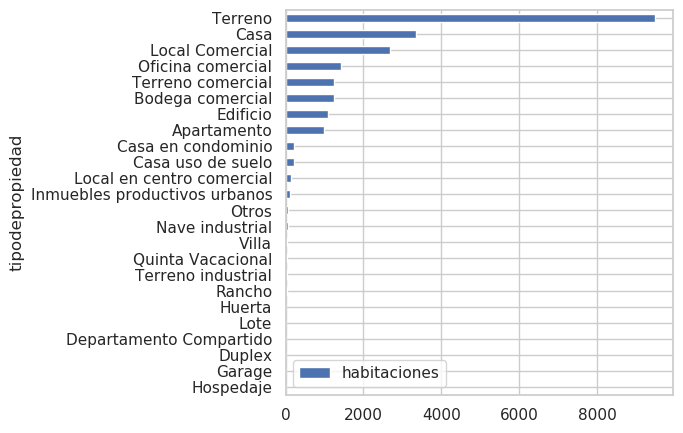

In [84]:
print('Cantidad valores nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'habitaciones':lambda x: x.isna().sum()}).sort_values(by='habitaciones', ascending=True).plot(kind='barh')

Porcentaje valores no nulos en cada propiedad


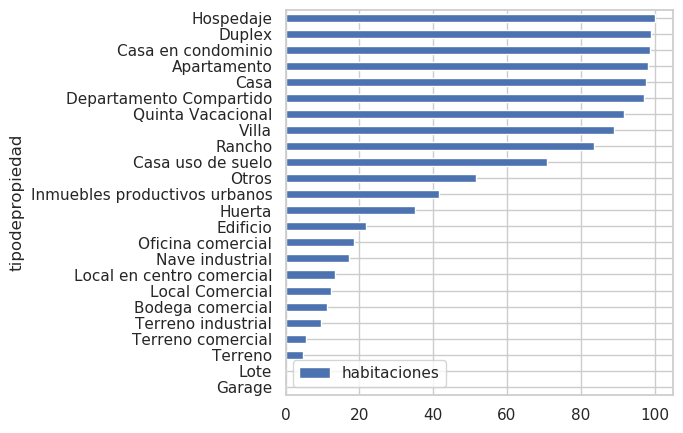

In [85]:
print('Porcentaje valores no nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'habitaciones':lambda x: x.count() / len(x) * 100}).sort_values(by='habitaciones', ascending=True).plot(kind='barh')

Completo solo aquellos datos cuyo porcentaje de datos no nulos sea mayor a 50%

In [87]:
habsPorTipo = {
    'Duplex' : [2,3],
    'Casa en condominio' : [3],
    'Apartamento' : [2,3],
    'Casa' : [2,3,4],
    'Departamento Compartido' : [2,3],
    'Quinta Vacacional' : [2,3],
    'Villa': [2,3],
    'Rancho' : [2,3],
    'Casa uso de suelo' : [3,4],
    'Otros' : [2,3]
}

In [101]:
for index, row in features.iterrows():    
    if (row.tipodepropiedad in habsPorTipo and pd.isnull(row.habitaciones)):
        features.loc[index,'habitaciones'] = random.choice(habsPorTipo.get(row.tipodepropiedad))

Porcentaje valores no nulos en cada propiedad


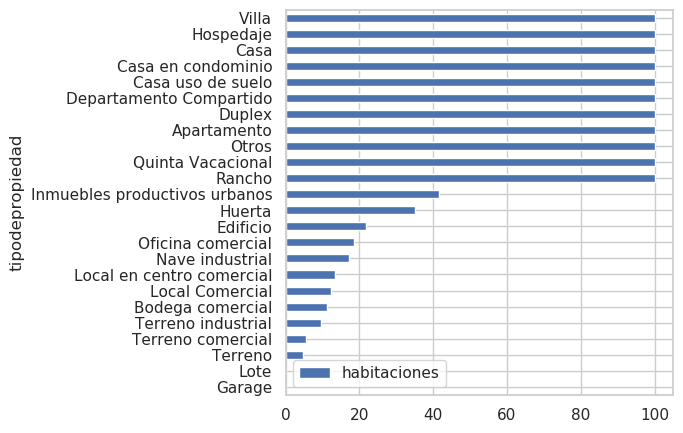

In [102]:
print('Porcentaje valores no nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'habitaciones':lambda x: x.count() / len(x) * 100}).sort_values(by='habitaciones', ascending=True).plot(kind='barh')

Elimino resto de habitaciones

In [113]:
print('Habitaciones con datos nulos: ', features.habitaciones.isna().sum())

Habitaciones con datos nulos:  17530


In [114]:
features = features.dropna(subset=['habitaciones'])

print(type(features))
len(features)

<class 'pandas.core.frame.DataFrame'>


222424

### Set Test

In [117]:
print('Habitaciones con datos nulos: ', df_test.habitaciones.isna().sum())
pd.pivot_table(df_test.groupby(['tipodepropiedad','habitaciones']).size().to_frame(), index='tipodepropiedad',columns=['habitaciones'])

Habitaciones con datos nulos:  5628


0                                          \
habitaciones                      1       2        3       4       5      6    
tipodepropiedad                                                                
Apartamento                    741.0  7420.0   5600.0   181.0    18.0    9.0   
Bodega comercial                11.0    12.0      6.0     9.0     2.0    2.0   
Casa                           374.0  5911.0  21173.0  5429.0  1042.0  372.0   
Casa en condominio              35.0   778.0   3438.0   549.0    48.0    8.0   
Casa uso de suelo                5.0    24.0     44.0    26.0    17.0   14.0   
Departamento Compartido          3.0    20.0     15.0     NaN     NaN    NaN   
Duplex                           1.0    53.0     21.0     2.0     1.0    1.0   
Edificio                         4.0    12.0     13.0     8.0     3.0    4.0   
Huerta                           NaN     1.0      1.0     NaN     NaN    NaN   
Inmuebles productivos urbanos    2.0     3.0      4.0     1.0     1.0    3.0   
Local Comercial                 25.0    33.0     22.0     7.0     8.0    5.0   
Local en centro comercial        NaN     NaN      NaN     1.0     1.0    NaN   
Nave industrial                  NaN     3.0      1.0     NaN     NaN    NaN   
Oficina comercial                9.0    21.0     18.0    10.0    11.0    7.0   
Otros                            2.0     8.0      5.0     1.0     NaN    NaN   
Quinta Vacacional                5.0    24.0     38.0    14.0     4.0    2.0   
Rancho                           5.0     6.0      9.0     3.0     NaN    1.0   
Terreno                         21.0    30.0     43.0    10.0     5.0    4.0   
Terreno comercial                NaN     2.0      3.0     1.0     NaN    NaN   
Villa                           10.0    26.0     43.0     8.0     3.0    2.0   

                                                        
habitaciones                      7     8     9     10  
tipodepropiedad                                         
Apartamento                      2.0   1.0   1.0   3.0  
Bodega comercial                 1.0   1.0   NaN   2.0  
Casa                           108.0  78.0  33.0  41.0  
Casa en condominio               3.0   1.0   NaN   1.0  
Casa uso de suelo                8.0   4.0   4.0   5.0  
Departamento Compartido          NaN   NaN   NaN   NaN  
Duplex                           NaN   NaN   NaN   NaN  
Edificio                         6.0   3.0   2.0  23.0  
Huerta                           NaN   NaN   NaN   NaN  
Inmuebles productivos urbanos    1.0   2.0   NaN   8.0  
Local Comercial                  NaN   1.0   NaN   6.0  
Local en centro comercial        NaN   NaN   NaN   NaN  
Nave industrial                  NaN   NaN   NaN   NaN  
Oficina comercial                4.0   4.0   1.0   4.0  
Otros                            NaN   NaN   NaN   NaN  
Quinta Vacacional                NaN   1.0   2.0   1.0  
Rancho                           1.0   NaN   NaN   NaN  
Terreno                          2.0   2.0   NaN   1.0  
Terreno comercial                NaN   1.0   NaN   NaN  
Villa                            NaN   NaN   NaN   NaN

Cantidad valores nulos en cada propiedad


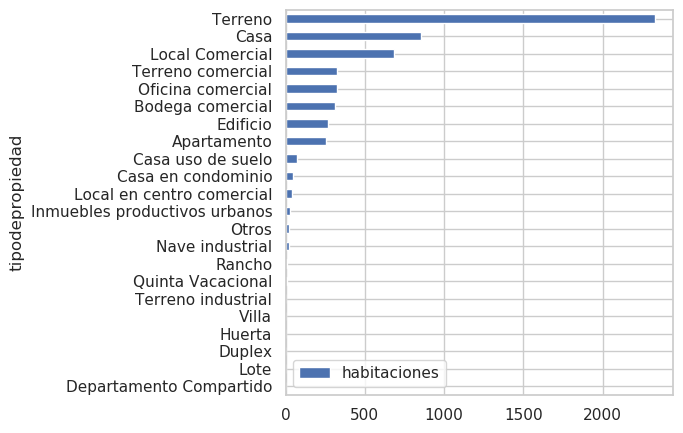

In [118]:
print('Cantidad valores nulos en cada propiedad')
df_test.groupby(['tipodepropiedad']).agg({'habitaciones':lambda x: x.isna().sum()}).sort_values(by='habitaciones', ascending=True).plot(kind='barh')

Porcentaje valores no nulos en cada propiedad


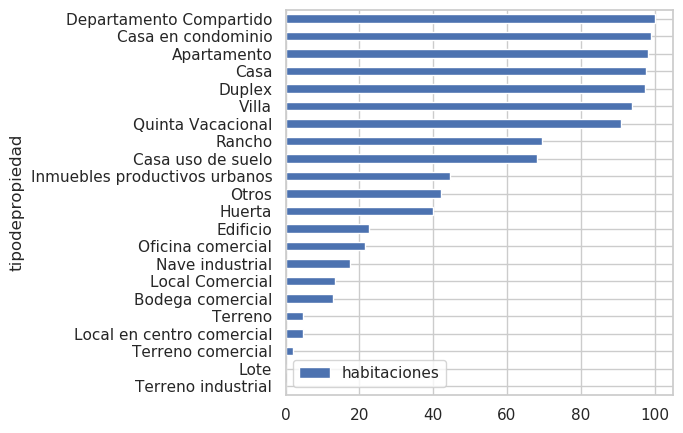

In [119]:
print('Porcentaje valores no nulos en cada propiedad')
df_test.groupby(['tipodepropiedad']).agg({'habitaciones':lambda x: x.count() / len(x) * 100}).sort_values(by='habitaciones', ascending=True).plot(kind='barh')

In [129]:
# En set test tengo que completar todos los datos
# De lote y terreno industrial no se tienen datos asi que se pone como opcion todo el rango
habsPorTipoTest = {
    'Apartamento' : [2,3],
    'Bodega comercial' : [1,2,3,4],
    'Casa' : [2,3,4],
    'Casa en condominio' : [3],
    'Casa uso de suelo' : [2,3,4],
    'Departamento Compartido' : [2,3],
    'Duplex' : [2,3],
    'Edificio' : [2,3,10],
    'Huerta' : [2,3],
    'Inmuebles productivos urbanos' : [10],
    'Local Comercial' : [1,2,3],
    'Local en centro comercial' : [4,5],
    'Nave industrial' : [2,3],
    'Oficina comercial' : [2,3],
    'Otros' : [2,3],
    'Quinta Vacacional' : [2,3],
    'Rancho' : [1,2,3],
    'Terreno' : [1,2,3],
    'Terreno comercial' : [2,3,4],
    'Villa': [2,3],
    'Terreno industrial' : [1,2,3,4,5,6,7,8,9,10],
    'Lote' : [1,2,3,4,5,6,7,8,9,10]
}

In [134]:
for index, row in df_test.iterrows():    
    if (row.tipodepropiedad in habsPorTipoTest and pd.isnull(row.habitaciones)):
        df_test.loc[index,'habitaciones'] = random.choice(habsPorTipoTest.get(row.tipodepropiedad))
    else: # Publicacion sin habitacion ni tipo de propiedad (cantidad muy baja de publicaciones)
        df_test.loc[index,'habitaciones'] = random.choice(range(1,10))

In [135]:
print('Habitaciones con datos nulos: ', df_test.habitaciones.isna().sum())

Habitaciones con datos nulos:  0


# Baños

In [136]:
print('Banos con datos nulos: ', features.banos.isna().sum())

Banos con datos nulos:  11634


In [137]:
pd.pivot_table(features.groupby(['tipodepropiedad','banos']).size().to_frame(), index='tipodepropiedad',columns=['banos'])

0                           
banos                                1        2        3        4
tipodepropiedad                                                  
Apartamento                    21144.0  25417.0   8001.0   1442.0
Bodega comercial                  56.0     51.0     20.0      7.0
Casa                           31425.0  52646.0  34646.0  14391.0
Casa en condominio              3160.0   7514.0   5710.0   2110.0
Casa uso de suelo                 93.0    230.0    140.0     88.0
Departamento Compartido           57.0     52.0     21.0      4.0
Duplex                           245.0     73.0     11.0      9.0
Edificio                          41.0     27.0     42.0     31.0
Huerta                             4.0      2.0      NaN      1.0
Inmuebles productivos urbanos     10.0     19.0     15.0      9.0
Local Comercial                  109.0    101.0     32.0     16.0
Local en centro comercial          5.0      2.0      NaN      1.0
Nave industrial                    3.0      3.0      1.0      4.0
Oficina comercial                 82.0     69.0     55.0     23.0
Otros                             22.0     30.0     16.0      3.0
Quinta Vacacional                 69.0    142.0     89.0     41.0
Rancho                            55.0     54.0     20.0      8.0
Terreno                          205.0    126.0     55.0     20.0
Terreno comercial                 27.0     19.0     12.0      4.0
Terreno industrial                 1.0      1.0      1.0      NaN
Villa                             78.0    108.0     85.0     29.0

Cantidad valores nulos en cada propiedad


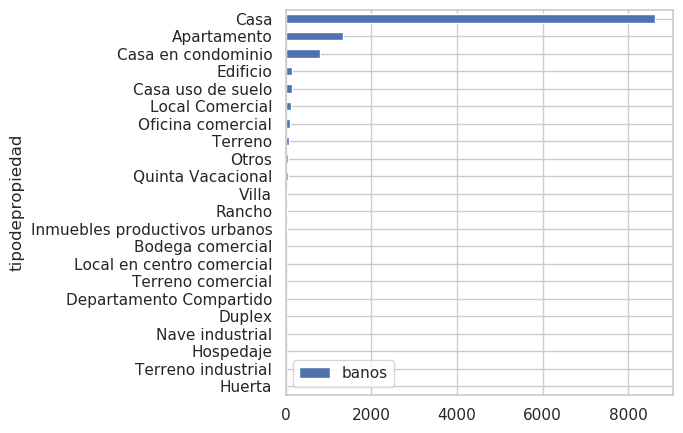

In [138]:
print('Cantidad valores nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'banos':lambda x: x.isna().sum()}).sort_values(by='banos', ascending=True).plot(kind='barh')

Porcentaje valores no nulos en cada propiedad


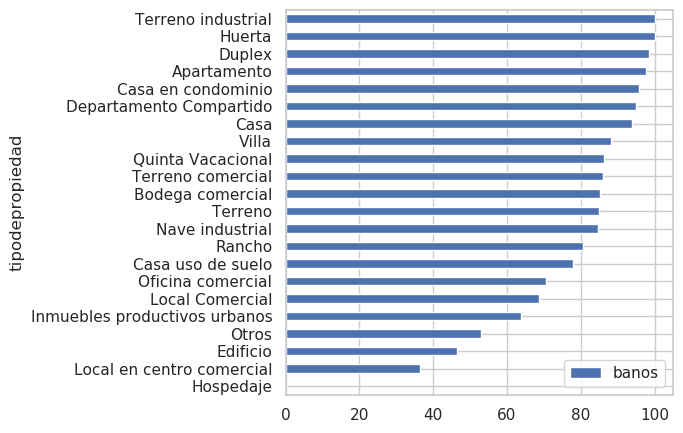

In [139]:
print('Porcentaje valores no nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'banos':lambda x: x.count() / len(x) * 100}).sort_values(by='banos', ascending=True).plot(kind='barh')

Completo todos los datos (menos huerta) porque en casos de bajos porcentajes se ven resultados balanceados

In [140]:
banoPortTipo = {
    'Apartamento' : [1,2],
    'Bodega comercial' : [1,2],
    'Casa' : [1,2,3],
    'Casa en condominio' : [1,2,3],
    'Casa uso de suelo' : [2,3],
    'Departamento Compartido' : [1,2],
    'Duplex' : [1],
    'Edificio' : [1,2,3,4],
    'Huerta' : [1,2,3],
    'Inmuebles productivos urbanos' : [1,2,3,4],
    'Local Comercial' : [1,2],
    'Local en centro comercial' : [1,2,3],
    'Nave industrial' : [1,2,3,4],
    'Oficina comercial' : [1,2,3],
    'Otros' : [1,2,3],
    'Quinta Vacacional' : [1,2,3],
    'Rancho' : [1,2],
    'Terreno' : [1,2],
    'Terreno comercial' : [1,2,3],
    'Villa': [1,2,3],
    'Terreno industrial' : [1,2,3]
}

In [141]:
for index, row in features.iterrows():    
    if (row.tipodepropiedad in banoPortTipo and pd.isnull(row.banos)):
        features.loc[index,'banos'] = random.choice(banoPortTipo.get(row.tipodepropiedad))

/home/seba/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Porcentaje valores no nulos en cada propiedad


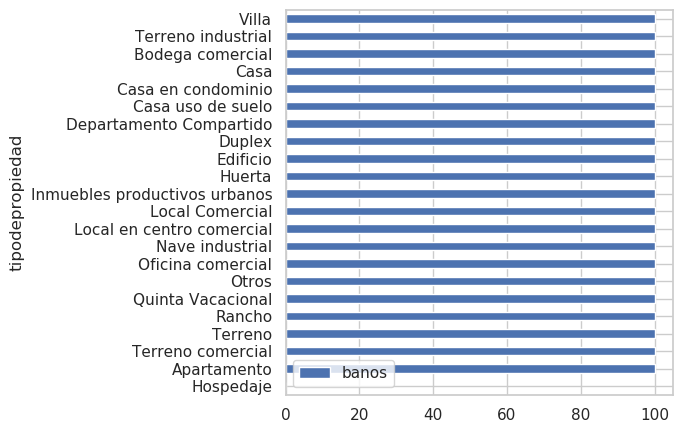

In [142]:
print('Porcentaje valores no nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'banos':lambda x: x.count() / len(x) * 100}).sort_values(by='banos', ascending=True).plot(kind='barh')

Elimino resto de habitaciones

In [144]:
print('Baños con datos nulos: ', features.banos.isna().sum())

Baños con datos nulos:  1


In [145]:
features = features.dropna(subset=['banos'])
len(features)

222423

### Set Test

In [146]:
print('Baños con datos nulos: ', df_test.banos.isna().sum())
pd.pivot_table(df_test.groupby(['tipodepropiedad','banos']).size().to_frame(), index='tipodepropiedad',columns=['banos'])

Baños con datos nulos:  6554


0                         
banos                               1        2       3       4
tipodepropiedad                                               
Apartamento                    5319.0   6294.0  1923.0   331.0
Bodega comercial                 86.0     76.0    21.0    16.0
Casa                           7918.0  13074.0  8755.0  3559.0
Casa en condominio              814.0   1936.0  1435.0   534.0
Casa uso de suelo                26.0     72.0    44.0    25.0
Departamento Compartido          17.0     18.0     3.0     NaN
Duplex                           69.0      8.0     2.0     NaN
Edificio                         20.0     23.0    14.0    37.0
Huerta                            NaN      2.0     NaN     NaN
Inmuebles productivos urbanos     4.0      8.0     3.0     2.0
Local Comercial                 183.0     87.0    40.0    23.0
Local en centro comercial        10.0      4.0     NaN     2.0
Nave industrial                   3.0      3.0     5.0     2.0
Oficina comercial                84.0     86.0    32.0    28.0
Otros                             6.0      6.0     5.0     NaN
Quinta Vacacional                13.0     33.0    21.0     8.0
Rancho                           10.0     11.0     4.0     1.0
Terreno                          52.0     40.0    17.0     7.0
Terreno comercial                18.0     17.0     2.0     4.0
Villa                            18.0     37.0    23.0    10.0

Cantidad valores nulos en cada propiedad


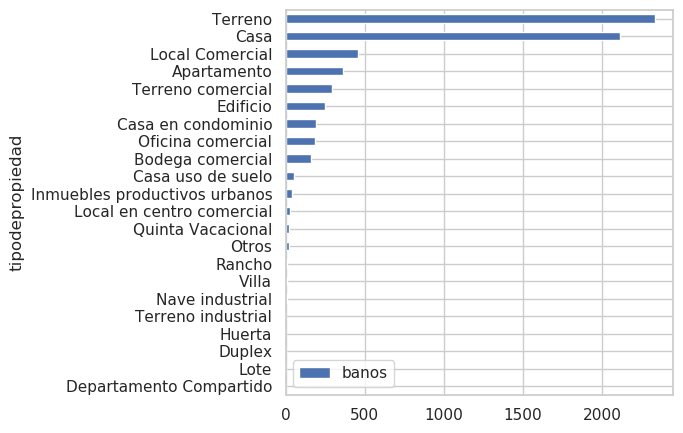

In [147]:
print('Cantidad valores nulos en cada propiedad')
df_test.groupby(['tipodepropiedad']).agg({'banos':lambda x: x.isna().sum()}).sort_values(by='banos', ascending=True).plot(kind='barh')

Porcentaje valores no nulos en cada propiedad


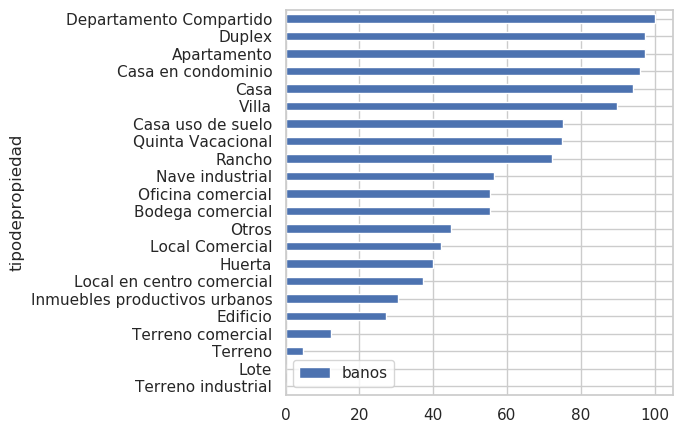

In [148]:
print('Porcentaje valores no nulos en cada propiedad')
df_test.groupby(['tipodepropiedad']).agg({'banos':lambda x: x.count() / len(x) * 100}).sort_values(by='banos', ascending=True).plot(kind='barh')

In [149]:
# Vuelvo a usar datos de features para completar ya que tienen misma tendencia
for index, row in df_test.iterrows():    
    if (row.tipodepropiedad in banoPortTipo and pd.isnull(row.habitaciones)):
        df_test.loc[index,'banos'] = random.choice(banoPortTipo.get(row.tipodepropiedad))
    else: # Publicacion sin banos ni tipo de propiedad (cantidad muy baja de publicaciones)
        df_test.loc[index,'banos'] = random.choice(range(1,4))

In [150]:
print('Baños con datos nulos: ', df_test.banos.isna().sum())

Baños con datos nulos:  0


# Garages

In [151]:
print('Garages con datos nulos: ', features.garages.isna().sum())

Garages con datos nulos:  32378


In [152]:
pd.pivot_table(features.groupby(['tipodepropiedad','garages']).size().to_frame(), index='tipodepropiedad',columns=['garages'])

0                           
garages                             0        1        2        3
tipodepropiedad                                                 
Apartamento                    5384.0  24034.0  20999.0   3188.0
Bodega comercial                 45.0     18.0     16.0     12.0
Casa                           9439.0  30943.0  62182.0  15192.0
Casa en condominio              455.0   3219.0   9732.0   2654.0
Casa uso de suelo               128.0    108.0    136.0     96.0
Departamento Compartido          20.0     53.0     53.0     11.0
Duplex                           29.0    228.0     68.0     11.0
Edificio                        114.0     34.0     32.0     28.0
Huerta                            3.0      NaN      NaN      NaN
Inmuebles productivos urbanos    18.0      9.0     17.0      5.0
Local Comercial                 124.0     66.0     60.0     27.0
Local en centro comercial         7.0      6.0      2.0      3.0
Nave industrial                   3.0      1.0      3.0      NaN
Oficina comercial                58.0     98.0     58.0     30.0
Otros                             4.0     16.0     25.0      7.0
Quinta Vacacional                88.0     10.0     31.0     27.0
Rancho                           53.0      8.0      7.0      7.0
Terreno                         142.0     45.0     57.0     31.0
Terreno comercial                21.0      6.0     11.0      7.0
Terreno industrial                1.0      NaN      NaN      1.0
Villa                            14.0     53.0     96.0     18.0

Cantidad valores nulos en cada propiedad


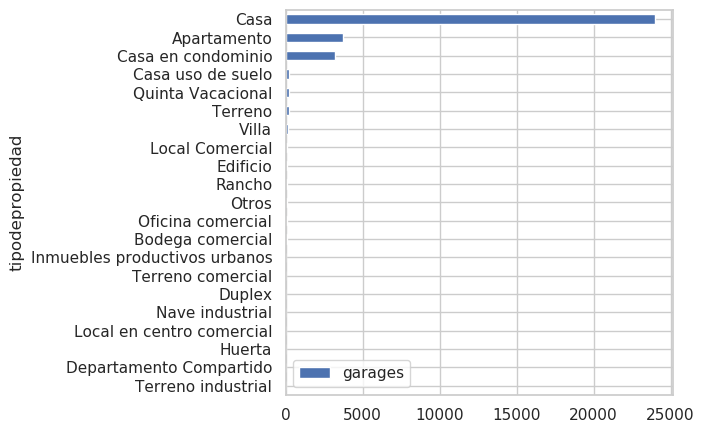

In [155]:
print('Cantidad valores nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'garages':lambda x: x.isna().sum()}).sort_values(by='garages', ascending=True).plot(kind='barh')

Porcentaje valores no nulos en cada propiedad


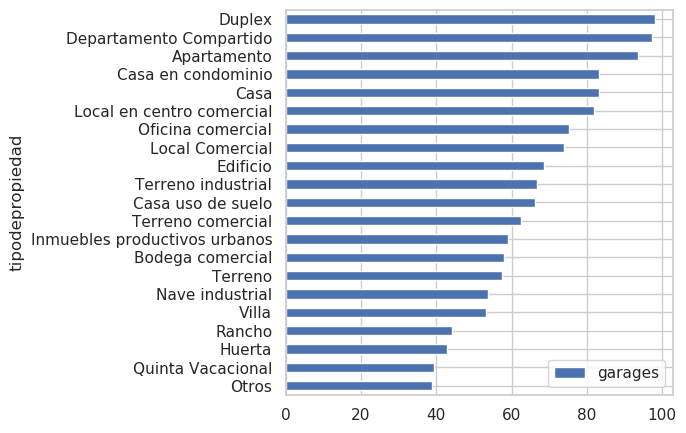

In [156]:
print('Porcentaje valores no nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'garages':lambda x: x.count() / len(x) * 100}).sort_values(by='garages', ascending=True).plot(kind='barh')

Completo los datos que tienen mas de 50% y los de menor porcentaje solo si muestran una tendencia clara

In [157]:
garagePortTipo = {
    'Apartamento' : [1,2],
    'Bodega comercial' : [0,1,2,3],
    'Casa' : [1,2],
    'Casa en condominio' : [1,2],
    'Casa uso de suelo' : [0,1,2,3],
    'Departamento Compartido' : [1,2],
    'Duplex' : [1],
    'Edificio' : [0],
    'Huerta' : [0],
    'Inmuebles productivos urbanos' : [0,1,2],
    'Local Comercial' : [0,1,2],
    'Local en centro comercial' : [0,1],
    'Nave industrial' : [0,1,2],
    'Oficina comercial' : [0,1,2],
    'Rancho' : [0],
    'Terreno' : [0],
    'Terreno comercial' : [0,2],
    'Villa': [1,2],
    'Terreno industrial' : [0,3]
}

In [158]:
for index, row in features.iterrows():    
    if (row.tipodepropiedad in garagePortTipo and pd.isnull(row.garages)):
        features.loc[index,'garages'] = random.choice(garagePortTipo.get(row.tipodepropiedad))

/home/seba/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Porcentaje valores no nulos en cada propiedad


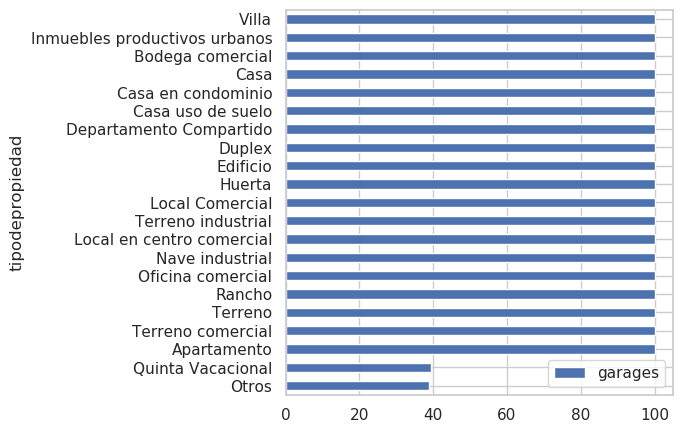

In [160]:
print('Porcentaje valores no nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'garages':lambda x: x.count() / len(x) * 100}).sort_values(by='garages', ascending=True).plot(kind='barh')

Elimino resto de habitaciones

In [162]:
print('Garages con datos nulos: ', features.garages.isna().sum())

Garages con datos nulos:  321


In [163]:
features = features.dropna(subset=['garages'])
len(features)

222102

### Set Test

In [164]:
print('Garages con datos nulos: ', df_test.garages.isna().sum())
pd.pivot_table(df_test.groupby(['tipodepropiedad','garages']).size().to_frame(), index='tipodepropiedad',columns=['garages'])

Garages con datos nulos:  9323


0                         
garages                             0       1        2       3
tipodepropiedad                                               
Apartamento                    1404.0  5953.0   5156.0   777.0
Bodega comercial                169.0    20.0     31.0    15.0
Casa                           2338.0  7756.0  15531.0  3873.0
Casa en condominio              122.0   835.0   2499.0   692.0
Casa uso de suelo                46.0    29.0     46.0    28.0
Departamento Compartido           3.0    15.0     17.0     1.0
Duplex                            7.0    60.0     12.0     NaN
Edificio                        144.0    21.0     22.0    28.0
Huerta                            3.0     NaN      NaN     NaN
Inmuebles productivos urbanos    35.0     2.0      5.0     1.0
Local Comercial                 337.0    53.0     68.0    26.0
Local en centro comercial        27.0     1.0      2.0     NaN
Lote                              1.0     NaN      NaN     NaN
Nave industrial                   8.0     1.0      4.0     3.0
Oficina comercial               120.0    75.0     65.0    18.0
Otros                             1.0     4.0      6.0     3.0
Quinta Vacacional                23.0     4.0     13.0     7.0
Rancho                           14.0     2.0      4.0     4.0
Terreno                        1796.0    19.0     23.0    15.0
Terreno comercial               176.0     2.0      2.0     2.0
Terreno industrial                2.0     NaN      NaN     NaN
Villa                             3.0    12.0     31.0     3.0

Cantidad valores nulos en cada propiedad


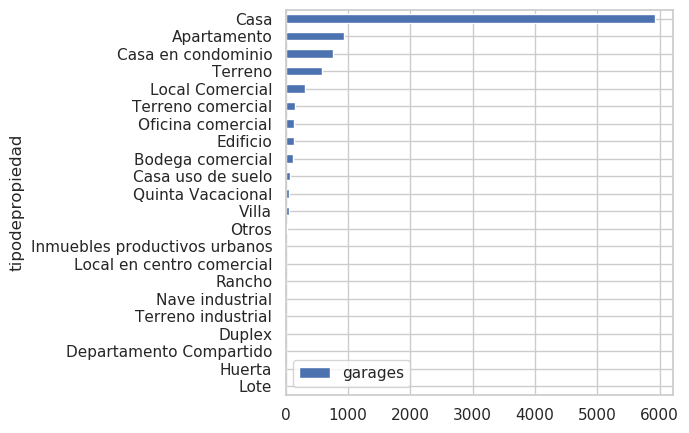

In [165]:
print('Cantidad valores nulos en cada propiedad')
df_test.groupby(['tipodepropiedad']).agg({'garages':lambda x: x.isna().sum()}).sort_values(by='garages', ascending=True).plot(kind='barh')

Porcentaje valores no nulos en cada propiedad


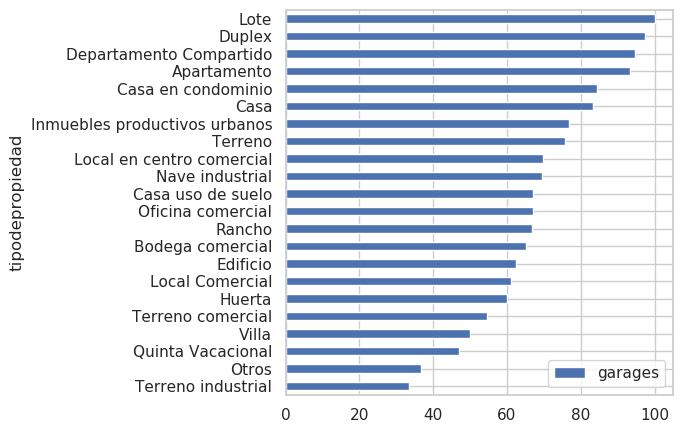

In [166]:
print('Porcentaje valores no nulos en cada propiedad')
df_test.groupby(['tipodepropiedad']).agg({'garages':lambda x: x.count() / len(x) * 100}).sort_values(by='garages', ascending=True).plot(kind='barh')

In [167]:
# Teniendo como base los valores de features modifico algunos campos
garagePortTipoTest = {
    'Apartamento' : [1,2],
    'Bodega comercial' : [0,1,2,3],
    'Casa' : [1,2],
    'Casa en condominio' : [1,2],
    'Casa uso de suelo' : [0,1,2,3],
    'Departamento Compartido' : [1,2],
    'Duplex' : [1],
    'Edificio' : [0],
    'Huerta' : [0],
    'Inmuebles productivos urbanos' : [0],
    'Local Comercial' : [0,1,2],
    'Local en centro comercial' : [0],
    'Nave industrial' : [0,2,3],
    'Otros' : [1,2,3],
    'Oficina comercial' : [0,1,2],
    'Rancho' : [0],
    'Terreno' : [0],
    'Terreno comercial' : [0],
    'Villa': [1,2],
    'Terreno industrial' : [0,3],
    'Lote' : [0]
}

In [168]:
# Vuelvo a usar datos de features para completar ya que tienen misma tendencia
for index, row in df_test.iterrows():    
    if (row.tipodepropiedad in garagePortTipoTest and pd.isnull(row.habitaciones)):
        df_test.loc[index,'garages'] = random.choice(garagePortTipoTest.get(row.tipodepropiedad))
    else: # Publicacion sin garages ni tipo de propiedad (cantidad muy baja de publicaciones)
        df_test.loc[index,'garages'] = random.choice(range(0,3))

In [169]:
print('Garages con datos nulos: ', df_test.garages.isna().sum())

Garages con datos nulos:  0


# Antiguedad

In [170]:
print('Anitguedad con datos nulos: ', features.antiguedad.isna().sum())

Anitguedad con datos nulos:  35517


In [174]:
pd.pivot_table(features.groupby(['tipodepropiedad','antiguedad']).size().to_frame(), index='tipodepropiedad',columns=['antiguedad']).T

tipodepropiedad  Apartamento  Bodega comercial     Casa  Casa en condominio  \
  antiguedad                                                                  
0 0                  10760.0               8.0  30727.0              3833.0   
  1                   3255.0               NaN   6867.0              1528.0   
  2                   1470.0               1.0   2820.0               540.0   
  3                   1553.0               5.0   3163.0               667.0   
  4                   2196.0               3.0   4550.0               897.0   
...                      ...               ...      ...                 ...   
  74                     1.0               NaN      1.0                 NaN   
  75                     1.0               NaN      4.0                 1.0   
  76                     NaN               NaN      NaN                 NaN   
  77                     NaN               NaN      1.0                 NaN   
  80                     3.0               NaN     21.0                 NaN   

tipodepropiedad  Casa uso de suelo  Departamento Compartido  Duplex  Edificio  \
  antiguedad                                                                    
0 0                           71.0                     35.0    27.0      13.0   
  1                           10.0                      6.0     8.0       6.0   
  2                            6.0                      3.0     8.0       4.0   
  3                            4.0                      5.0     9.0       8.0   
  4                           13.0                     10.0    10.0      11.0   
...                            ...                      ...     ...       ...   
  74                           NaN                      NaN     NaN       NaN   
  75                           NaN                      NaN     NaN       NaN   
  76                           NaN                      NaN     NaN       NaN   
  77                           NaN                      NaN     NaN       NaN   
  80                           NaN                      NaN     NaN       NaN   

tipodepropiedad  Huerta  Inmuebles productivos urbanos  ...  \
  antiguedad                                            ...   
0 0                 NaN                            NaN  ...   
  1                 NaN                            6.0  ...   
  2                 NaN                            NaN  ...   
  3                 NaN                            1.0  ...   
  4                 NaN                            5.0  ...   
...                 ...                            ...  ...   
  74                NaN                            NaN  ...   
  75                NaN                            NaN  ...   
  76                NaN                            NaN  ...   
  77                NaN                            NaN  ...   
  80                NaN                            NaN  ...   

tipodepropiedad  Local en centro comercial  Nave industrial  \
  antiguedad                                                  
0 0                                    3.0              NaN   
  1                                    NaN              NaN   
  2                                    1.0              NaN   
  3                                    NaN              2.0   
  4                                    4.0              NaN   
...                                    ...              ...   
  74                                   NaN              NaN   
  75                                   NaN              NaN   
  76                                   NaN              NaN   
  77                                   NaN              NaN   
  80                                   NaN              NaN   

tipodepropiedad  Oficina comercial  Otros  Quinta Vacacional  Rancho  Terreno  \
  antiguedad                                                                    
0 0                           19.0   19.0               28.0    14.0     35.0   
  1                            6.0 

Cantidad valores nulos en cada propiedad


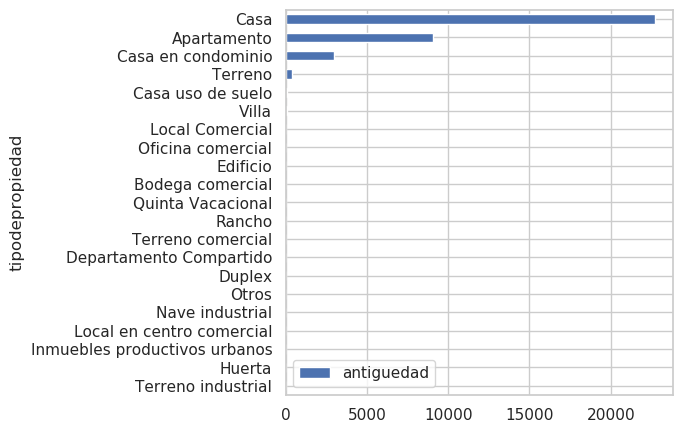

In [172]:
print('Cantidad valores nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'antiguedad':lambda x: x.isna().sum()}).sort_values(by='antiguedad', ascending=True).plot(kind='barh')

Porcentaje valores no nulos en cada propiedad


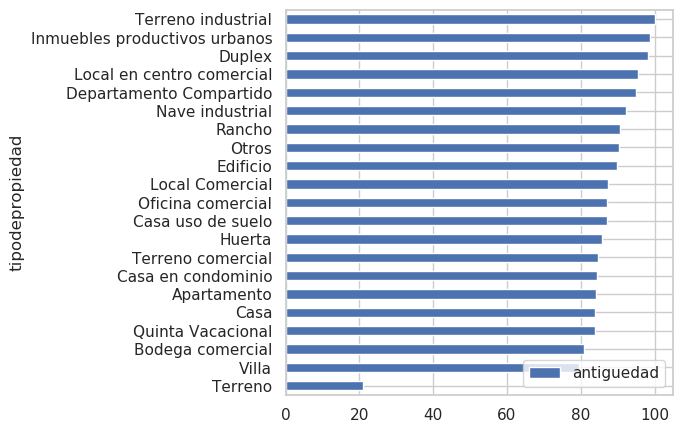

In [173]:
print('Porcentaje valores no nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'antiguedad':lambda x: x.count() / len(x) * 100}).sort_values(by='antiguedad', ascending=True).plot(kind='barh')

Al tener un porcentaje muy alto de todos los tipos menos terreno (a descartar) tomo la moda de antiguedad para completar datos nulos

In [157]:
garagePortTipo = {
    'Apartamento' : [1,2],
    'Bodega comercial' : [0,1,2,3],
    'Casa' : [1,2],
    'Casa en condominio' : [1,2],
    'Casa uso de suelo' : [0,1,2,3],
    'Departamento Compartido' : [1,2],
    'Duplex' : [1],
    'Edificio' : [0],
    'Huerta' : [0],
    'Inmuebles productivos urbanos' : [0,1,2],
    'Local Comercial' : [0,1,2],
    'Local en centro comercial' : [0,1],
    'Nave industrial' : [0,1,2],
    'Oficina comercial' : [0,1,2],
    'Rancho' : [0],
    'Terreno' : [0],
    'Terreno comercial' : [0,2],
    'Villa': [1,2],
    'Terreno industrial' : [0,3]
}

In [158]:
for index, row in features.iterrows():    
    if (row.tipodepropiedad in garagePortTipo and pd.isnull(row.garages)):
        features.loc[index,'garages'] = random.choice(garagePortTipo.get(row.tipodepropiedad))

/home/seba/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Porcentaje valores no nulos en cada propiedad


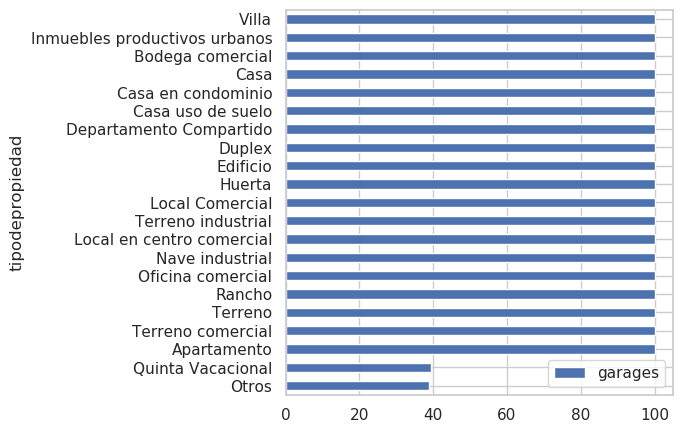

In [160]:
print('Porcentaje valores no nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'garages':lambda x: x.count() / len(x) * 100}).sort_values(by='garages', ascending=True).plot(kind='barh')

Elimino resto de habitaciones

In [162]:
print('Garages con datos nulos: ', features.garages.isna().sum())

Garages con datos nulos:  321


In [163]:
features = features.dropna(subset=['garages'])
len(features)

222102

### Set Test

In [164]:
print('Garages con datos nulos: ', df_test.garages.isna().sum())
pd.pivot_table(df_test.groupby(['tipodepropiedad','garages']).size().to_frame(), index='tipodepropiedad',columns=['garages'])

Garages con datos nulos:  9323


0                         
garages                             0       1        2       3
tipodepropiedad                                               
Apartamento                    1404.0  5953.0   5156.0   777.0
Bodega comercial                169.0    20.0     31.0    15.0
Casa                           2338.0  7756.0  15531.0  3873.0
Casa en condominio              122.0   835.0   2499.0   692.0
Casa uso de suelo                46.0    29.0     46.0    28.0
Departamento Compartido           3.0    15.0     17.0     1.0
Duplex                            7.0    60.0     12.0     NaN
Edificio                        144.0    21.0     22.0    28.0
Huerta                            3.0     NaN      NaN     NaN
Inmuebles productivos urbanos    35.0     2.0      5.0     1.0
Local Comercial                 337.0    53.0     68.0    26.0
Local en centro comercial        27.0     1.0      2.0     NaN
Lote                              1.0     NaN      NaN     NaN
Nave industrial                   8.0     1.0      4.0     3.0
Oficina comercial               120.0    75.0     65.0    18.0
Otros                             1.0     4.0      6.0     3.0
Quinta Vacacional                23.0     4.0     13.0     7.0
Rancho                           14.0     2.0      4.0     4.0
Terreno                        1796.0    19.0     23.0    15.0
Terreno comercial               176.0     2.0      2.0     2.0
Terreno industrial                2.0     NaN      NaN     NaN
Villa                             3.0    12.0     31.0     3.0

Cantidad valores nulos en cada propiedad


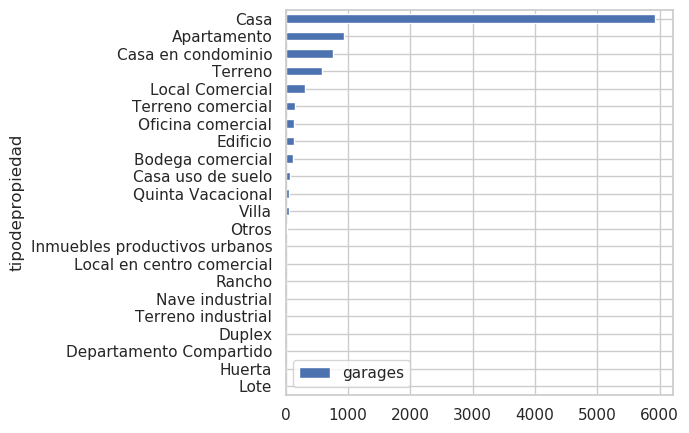

In [165]:
print('Cantidad valores nulos en cada propiedad')
df_test.groupby(['tipodepropiedad']).agg({'garages':lambda x: x.isna().sum()}).sort_values(by='garages', ascending=True).plot(kind='barh')

Porcentaje valores no nulos en cada propiedad


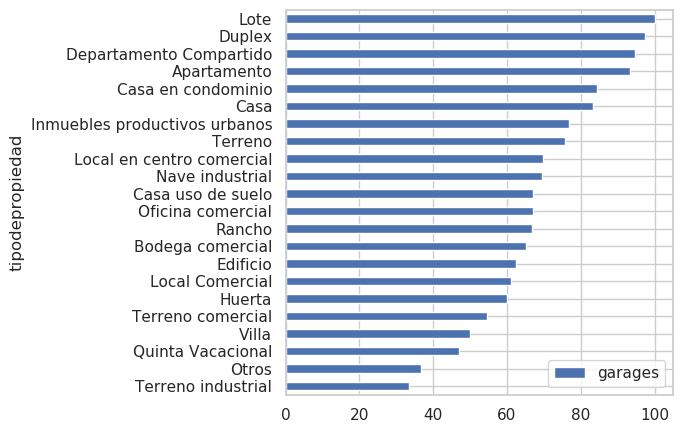

In [166]:
print('Porcentaje valores no nulos en cada propiedad')
df_test.groupby(['tipodepropiedad']).agg({'garages':lambda x: x.count() / len(x) * 100}).sort_values(by='garages', ascending=True).plot(kind='barh')

In [167]:
# Teniendo como base los valores de features modifico algunos campos
garagePortTipoTest = {
    'Apartamento' : [1,2],
    'Bodega comercial' : [0,1,2,3],
    'Casa' : [1,2],
    'Casa en condominio' : [1,2],
    'Casa uso de suelo' : [0,1,2,3],
    'Departamento Compartido' : [1,2],
    'Duplex' : [1],
    'Edificio' : [0],
    'Huerta' : [0],
    'Inmuebles productivos urbanos' : [0],
    'Local Comercial' : [0,1,2],
    'Local en centro comercial' : [0],
    'Nave industrial' : [0,2,3],
    'Otros' : [1,2,3],
    'Oficina comercial' : [0,1,2],
    'Rancho' : [0],
    'Terreno' : [0],
    'Terreno comercial' : [0],
    'Villa': [1,2],
    'Terreno industrial' : [0,3],
    'Lote' : [0]
}

In [168]:
# Vuelvo a usar datos de features para completar ya que tienen misma tendencia
for index, row in df_test.iterrows():    
    if (row.tipodepropiedad in garagePortTipoTest and pd.isnull(row.habitaciones)):
        df_test.loc[index,'garages'] = random.choice(garagePortTipoTest.get(row.tipodepropiedad))
    else: # Publicacion sin garages ni tipo de propiedad (cantidad muy baja de publicaciones)
        df_test.loc[index,'garages'] = random.choice(range(0,3))

In [169]:
print('Garages con datos nulos: ', df_test.garages.isna().sum())

Garages con datos nulos:  0


In [ ]:
features.antiguedad.isna().value_counts()

In [ ]:
# Calculo diferencia promedio entre metrostotales y metroscubiertos por cada tipo de propiedad
meanAgeByType = features.groupby('tipodepropiedad').agg({'age':'mode'}).T
# meanAgeByType = meanAgeByType.fillna(0).T # Completo NaN con 0 ya que no hay datos para calcular diferencia
# meanAgeByType = meanAgeByType.round(0).astype(np.uint16)
meanAgeByType

In [ ]:
features['antiguedad'] = imp.fit_transform(features[['antiguedad']])

df_test['antiguedad'] = imp.fit_transform(df_test[['antiguedad']])

# Ciudad

In [ ]:
def ciudadesByProvinciaMap(df):
    provs_ciudades = {}
    for i in range(0,len(df)):
        prov = df.loc[i,'provincia']
        city = df.loc[i,'ciudad']
        if ((not pd.isna(prov)) and (not pd.isna(city))):
            if (not prov in provs_ciudades):
                provs_ciudades[prov] = []
            if (not city in provs_ciudades[prov]):
                provs_ciudades[prov].append(city)
    return provs_ciudades

In [ ]:
def provinciaByIdZonaMap(df):
    id_prov = {}
    for i in range(0,len(df)):
        prov = df.loc[i,'provincia']
        idzona = df.loc[i,'idzona']
        if ((not pd.isna(prov)) and (not pd.isna(idzona))):
            if (not idzona in id_prov):
                id_prov[idzona] = []
            if (not prov in id_prov[idzona]):
                id_prov[idzona].append(prov)
    return id_prov

# Provincia

One hot encoding

In [ ]:
Noroeste = ['Baja California Norte', 'Baja California Sur','Chihuahua', 'Durango', 'Sinaloa', 'Sonora']
Noreste = ['Coahuila','Nuevo León', 'Tamaulipas']
Oeste = ['Colima', 'Jalisco', 'Michoacán', 'Nayarit']
Este = ['Hidalgo', 'Puebla', 'Tlaxcala', 'Veracruz']
Centronorte = ['Aguascalientes', 'Guanajuato', 'Querétaro', 'San luis Potosí', 'Zacatecas']
Centrosur = ['Edo. de México', 'Distrito Federal', 'Morelos']
Suroeste = ['Chiapas', 'Guerrero', 'Oaxaca']
Sureste = ['Campeche', 'Quintana Roo', 'Tabasco', 'Yucatán']

In [ ]:
def region(provincia):
    if(provincia in Noroeste):
        return 'Noroeste'
    if(provincia in Noreste):
        return 'Noreste'
    if(provincia in Oeste):
        return 'Oeste'
    if(provincia in Este):
        return 'Este'
    if(provincia in Centronorte):
        return 'Centronorte'
    if(provincia in Centrosur):
        return 'Centrosur'
    if(provincia in Suroeste):
        return 'Suroeste'
    return 'Sureste'

In [ ]:
features['region'] = features['provincia'].apply(region)
df_test['region'] = df_test['provincia'].apply(region)

In [ ]:
# One-hot regiones
features = features.reset_index(drop=True)

one_hot = pd.get_dummies(features.region)
features = features.drop(['region','provincia'],axis = 1)
features = features.merge(one_hot, right_index=True, left_index=True)

one_hot_test = pd.get_dummies(df_test.region)
df_test = df_test.drop(['region','provincia'],axis = 1)
df_test = df_test.merge(one_hot_test, right_index=True, left_index=True)

features = features.reset_index(drop=True)  # Corrijo index con rows eliminadas para que funcione el for

# Tipo de propiedad

In [ ]:
features_tipos = features.tipodepropiedad.value_counts().index
print(len(features_tipos))
features_tipos.sort_values()

In [ ]:
test_tipos = df_test.tipodepropiedad.value_counts().index
print(len(test_tipos))
test_tipos.sort_values()

In [ ]:
features = features.reset_index(drop=True)

one_hot = pd.get_dummies(features.tipodepropiedad)
features = features.drop('tipodepropiedad',axis = 1)
features = features.merge(one_hot, right_index=True, left_index=True)

one_hot_test = pd.get_dummies(df_test.tipodepropiedad)
df_test = df_test.drop('tipodepropiedad',axis = 1)
df_test = df_test.merge(one_hot_test, right_index=True, left_index=True)

In [ ]:
print(list(set(features.columns) - set(df_test.columns)))
print(list(set(df_test.columns) - set(features.columns)))

In [ ]:
df_test.Lote.value_counts()

In [ ]:
# Elimino columnas que no aparecen en los features (Solo una publicacion con Lote)
df_test = df_test.drop('Lote',axis=1)

# Fix Test data set

In [ ]:
len(df_test)

In [ ]:
cols_dropped = ['lat', 'lng', 'id', 'idzona']
cols_string = ['titulo', 'descripcion','direccion', 'ciudad']
df_test.drop(cols_dropped + cols_string, axis=1).count()

In [ ]:
df_test['garages'] = imp.fit_transform(df_test[['garages']])

In [ ]:
cols_dropped = ['lat', 'lng', 'idzona']
cols_string = ['titulo', 'descripcion','direccion', 'ciudad']
df_test.drop(cols_dropped + cols_string, axis=1).count()

# Features a CSV

In [ ]:
cols_dropped = ['lat', 'lng', 'id', 'idzona']
cols_string = ['titulo', 'descripcion','direccion', 'ciudad']
features = features.drop(cols_dropped + cols_string, axis=1)
cols_dropped = ['lat', 'lng', 'idzona']
df_test = df_test.drop(cols_dropped + cols_string, axis=1)

In [ ]:
features.to_csv('data/features.csv', index=False)
df_test.to_csv('data/testModified.csv', index=False)